# 판다스 더 알아보기

In [11]:
import pandas as pd
# 원본 크기 (10886, 12) / 10876
sample = pd.read_csv('train.csv', skiprows = lambda x : x > 10)
print(sample.shape)
sample.head()
# shift + tab 누르면 공식 문서(도움말) 확인 가능
# 인터넷 끊겨있어도 볼 수 있음

(10, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


##### agg - aggregate
* 그룹 합산

In [13]:
import numpy as np
np.unique(df['season'])

array([1, 2, 3, 4], dtype=int64)

In [14]:
mapper = {'registered' : np.mean}
df.groupby('season').agg(mapper)
# groupby -> 어떤 컬럼을 기준으로 그룹(묶을지)할 것인가를 나타냅니다.
# 현재 season 컬럼의 경우 1, 2, 3, 4 값이 있기 때문에 이를 기준으로 묶는다면
# 모든 row는 각각 1, 2, 3, 4 중 하나의 덩어리에 묶일 것입니다.
# 그리고 한 덩어리당 들어가는 row가 여러 개일 것이므로 이를 어떤 기준을 잡아서 정리해주어야 합니다.
# 이 때 사용하는 기능이 aggregate 입니다.
# 기준점을 갖고 묶은 이후에 .agg 이용하여 묶인 row 에 대해 어떤 컬럼 기준으로
# 어떤 함수로 처리하여 그 묶음(group) 을 대표하는 값으로 만들 것인지 결정합니다.
# 위 예시의 경우 registered 컬럼을 기준으로 모아서 수식을 적용할 것이고
# 그 수식은 평균입니다.
# 따라서 위 코드의 결과는 계절별로 등록회원의 평균 대여량 비교입니다.

,registered
season,
1,100.853686
2,167.804610
3,182.196853
4,170.407462


In [16]:
reg_mean = {'registered' : np.mean}
cas_mean = {'casual' : np.mean}
reg = df.groupby('season').agg(reg_mean).reset_index()
cas = df.groupby('season').agg(cas_mean).reset_index()
# reset_index는 인덱스에 있던 season을 column으로 풀어주는 방법입니다.
# 앞으로 컬럼을 조작하는 빙식으로 season 을 다루고자 한다면
# season 이 index가 아닌 column으로 있어야 합니다.

In [19]:
reg

,season,registered
0,1,100.853686
1,2,167.804610
2,3,182.196853
3,4,170.407462


In [20]:
cas

,season,casual
0,1,15.489576
1,2,47.446762
2,3,52.220271
3,4,28.580834


##### 두 개의 데이터 프레임을 합치는 방법 - join
* 기준을 두 데이터 프레임 중 어떤 것으로 할지에 대한 부분 - left, right
* 기준을 집합 개념으로 교집합, 합집합 적용해서 합치면 - inner, outer

In [22]:
pd.merge(cas, reg)

,season,casual,registered
0,1,15.489576,100.853686
1,2,47.446762,167.804610
2,3,52.220271,182.196853
3,4,28.580834,170.407462


In [21]:
reg[::2]

,season,registered
0,1,100.853686
2,3,182.196853


In [30]:
pd.merge(cas, reg[::2], how='right')

,season,casual,registered
0,1,15.489576,100.853686
1,3,52.220271,182.196853


In [31]:
pd.merge(reg[::2], cas, how='left')

,season,registered,casual
0,1,100.853686,15.489576
1,3,182.196853,52.220271


In [32]:
pd.merge(cas, reg[::2], how='inner')

,season,casual,registered
0,1,15.489576,100.853686
1,3,52.220271,182.196853


In [33]:
pd.merge(cas, reg[::2], how='outer')

,season,casual,registered
0,1,15.489576,100.853686
1,2,47.446762,NaN
2,3,52.220271,182.196853
3,4,28.580834,NaN


##### datetime processing
* 날짜를 다루는 방법

In [39]:
df['datetime'][0]
# datetime 컬럼 선택 후 0번째 인덱스에 무엇이 있나 보았습니다.
# 문자열로 날짜 정보가 들어있음을 확인합니다.

'2011-01-01 00:00:00'

In [43]:
sample = '2011-01-01 00:00:00'
ymd = sample.split(' ')[0]
hms = sample.split(' ')[1]
year = int(ymd.split('-')[0])
month = int(ymd.split('-')[1])
day = int(ymd.split('-')[2])
hour = int(hms.split(':')[0])
minute = int(hms.split(':')[1])
second = int(hms.split(':')[2])
print(year, month, day, hour, minute, second)

2011 1 1 0 0 0


In [44]:
df['year'] = df['datetime'].apply(lambda x : int(x.split(' ')[0].split('-')[0]))
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [50]:
pd.to_datetime(sample).dayofweek

5

In [54]:
datetimer = df['datetime'].apply(pd.to_datetime)
# .apply 이용하여 datetime 컬럼 안의 모든 값들에 대해
# 일괄 pd.to_datetime 변환을 진행합니다.
df['year'] = datetimer.apply(lambda x : x.year)
df['month'] = datetimer.apply(lambda x : x.month)
df['day'] = datetimer.apply(lambda x : x.day)
df['hour'] = datetimer.apply(lambda x : x.hour)
df['dayofweek'] = datetimer.apply(lambda x : x.dayofweek)
# 이후 연, 월, 일, 시, 요일 정보를 각각 추출하여
# 새로운 컬럼을 만들어 이 정보를 넣었습니다.
# 분과 초를 하지 않은 이유는 원본 데이터에서
# 분과 초에 관한 데이터가 들어있지 않아서입니다.
df['year_month'] = df['year'].apply(str) + '-' + df['month'].apply(str)
interested = ['datetime', 'year', 'month', 'day', 'hour', 'dayofweek', 'year_month']
df[interested].head()

,datetime,year,month,day,hour,dayofweek,year_month
0,2011-01-01 00:00:00,2011,1,1,0,5,2011-1
1,2011-01-01 01:00:00,2011,1,1,1,5,2011-1
2,2011-01-01 02:00:00,2011,1,1,2,5,2011-1
3,2011-01-01 03:00:00,2011,1,1,3,5,2011-1
4,2011-01-01 04:00:00,2011,1,1,4,5,2011-1


##### 그래프 그리는 여러가지 방법
* pandas, matplotlib, seaborn

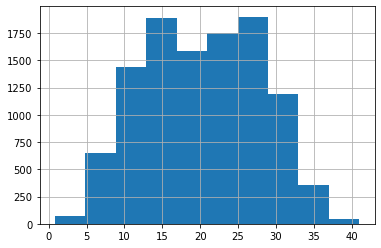

In [57]:
df['temp'].hist()

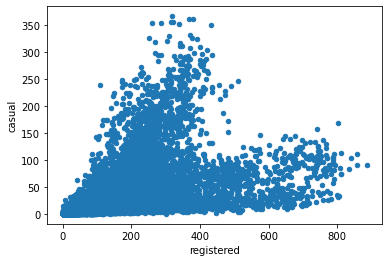

In [58]:
df.plot.scatter(x='registered', y='casual')
# 산점도 - 산포된 점 그림
# scatterplot 단어는 scatter -> 퍼져있다, plot -> 도표 입니다.
# 데이터를 퍼져있는 점으로 표현한다는 것입니다.
# 지금의 경우 x 축은 registered, y 축은 casual 컬럼을 기준으로
# 퍼져있는 점을 찍어 데이터를 표현한다는 것입니다.
# 만약 한 row에서 registered 가 600 이고 casual 이 50 이라면
# 산점도에서 해당 row 는 (600, 50) 지점에 점 하나로 표현될 것입니다.

<BarContainer object of 10886 artists>

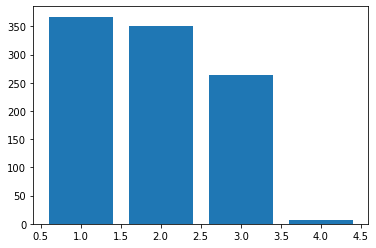

In [61]:
import matplotlib.pyplot as plt
# matplotlib 안의 pyplot를 가져온 후 plt라는 축약어로 사용하고자 합니다.
%matplotlib inline
# matplotlib 으로 그래프를 그릴 경우
# 주피러 노트북에 그래프 내용을 포함하겠다는 명령어가 필요할 경우가 있습니다.
# %matplotlib inline 을 통해 이 주피터노트북 파일 안에서
# matplotlib 으로 그래프를 그리는 경우 내용을 포함하게 만들어줄 수 있습니다.
plt.bar(data=df, x='weather', height='casual')
# barplot(소위 말하는 막대그래프입니다.)
# 막대그래프 그릴 때에는 x축이 서로 띄엄띄엄 떨어진 데이터로 그리게 됩니다.
# 지금의 경우 weather 컬럼이 1, 2, 3, 4 서로 1씩 떨어져 있습니다.

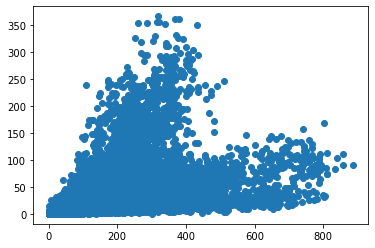

In [62]:
plt.scatter(data=df, x='registered', y='casual')

##### seaborn - 이쁜 그래프 그리기

In [63]:
import seaborn as sns
# seaborn 도구를 불러와 sns라는 축약어로 사용하고자 합니다.

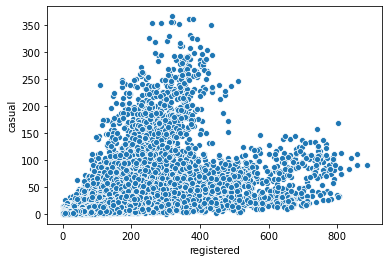

In [64]:
sns.scatterplot(data=df, x='registered', y='casual')
# matplotlib, pandas에서의 scatterplot과 사실상 같은 내용.
# seaborn 에서는 점이 몰려있는 정도를 어느정도 식별할 수 있게끔
# 점의 테두리에 색을 입혀놓았습니다.

##### seaborn의 hue 기능
* 그래프에 색상(hue)를 이용하여 정보(차원)을 추가하는 기법

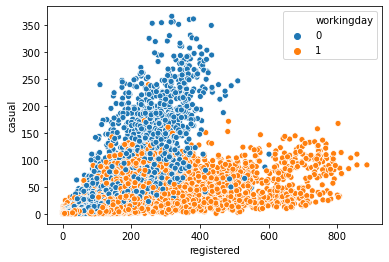

In [74]:
sns.scatterplot(data=df, x='registered', y='casual', hue='workingday')

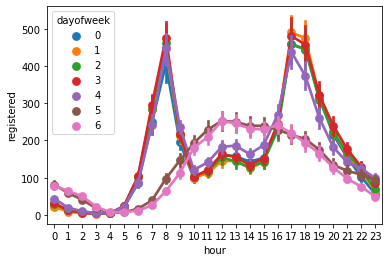

In [84]:
sns.pointplot(data=df, x='hour', y='registered', hue='dayofweek')

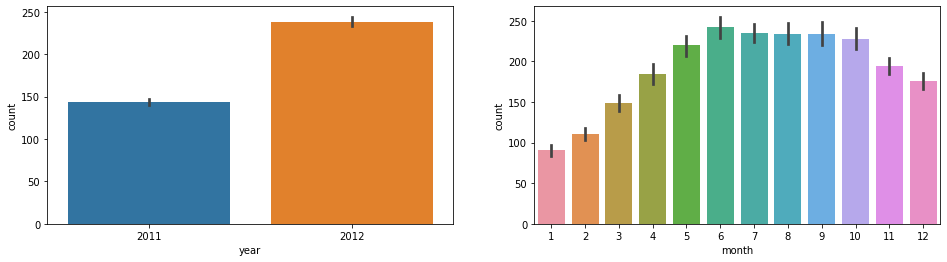

In [88]:
# 한 화면에 여러 개의 그래프를 표현하는 방법
figure, (ax1, ax2) = plt.subplots(ncols=2)
# plt.subplots 부분은 그림 그릴 영역(캔버스)을 만들고자 하는 코드입니다.

# (ncols=2) 부분은 캔버스에 그래프를 두 개의 컬럼 형태로 그린다는 것인데 
# column은 세로를 의미하는 열이므로 열 2개 형태로 그래프를 넣겠다는 것입니다.
# 따라서 가로 기준으로 두 개의 그래프(열이 2개이므로)가 그려질 것입니다.

# = 왼쪽 영역은 figure, (ax1, ax2) 가 있는데요
# (ax1, ax2)의 경우 캔버스에 그래프 두 개가 들어갈 것이라는 의미이고
# 그래프가 각각 ax1, ax2에 들어간다는 것은
# seaborn 코드상 ax=ax1 식으로 표기를 했기 때문입니다.
# ncols=2는 컬럼2 이므로 두 개의 컬럼 형식으로 그래프를 넣겠다는 것이고
# (ax1, ax2)는 그래프가 두 개이므로 이를 튜플 형태로 표현한 것입니다.
# figure는 그림을 그릴 캔버스를 의미합니다.
figure.set_size_inches(16, 4)

# figure는 그래프가 두 개 들어갈 캔버스인 것인데
# figure.set_size_inches 는 이 캔버스의 가로세로 크기를 설정하고자 하는 코드입니다.
# .set_size_inches(16, 4)는 16 : 4 크기로 그린다는 것입니다.
sns.barplot(data=df, x='year', y='count', ax=ax1)
sns.barplot(data=df, x='month', y='count', ax=ax2)

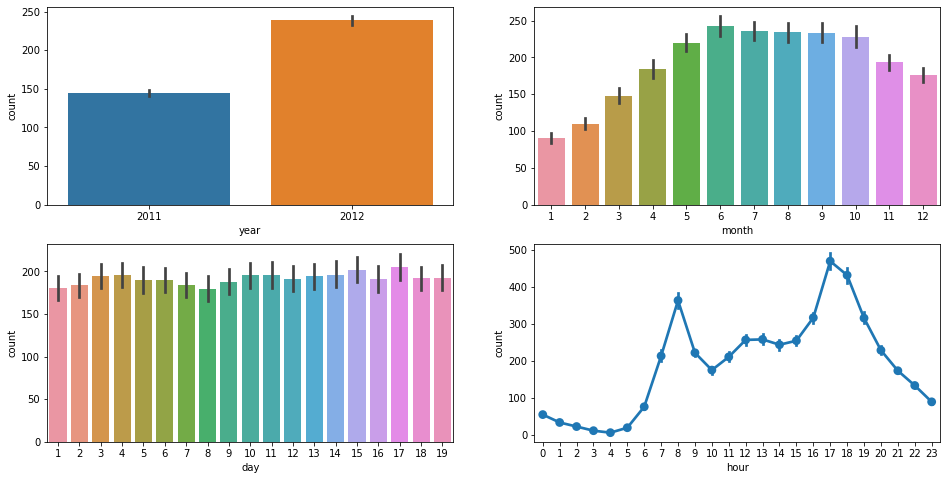

In [95]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(16, 8)
sns.barplot(data=df, x='year', y='count', ax=ax1)
sns.barplot(data=df, x='month', y='count', ax=ax2)
sns.barplot(data=df, x='day', y='count', ax=ax3)
sns.pointplot(data=df, x='hour', y='count', ax=ax4)

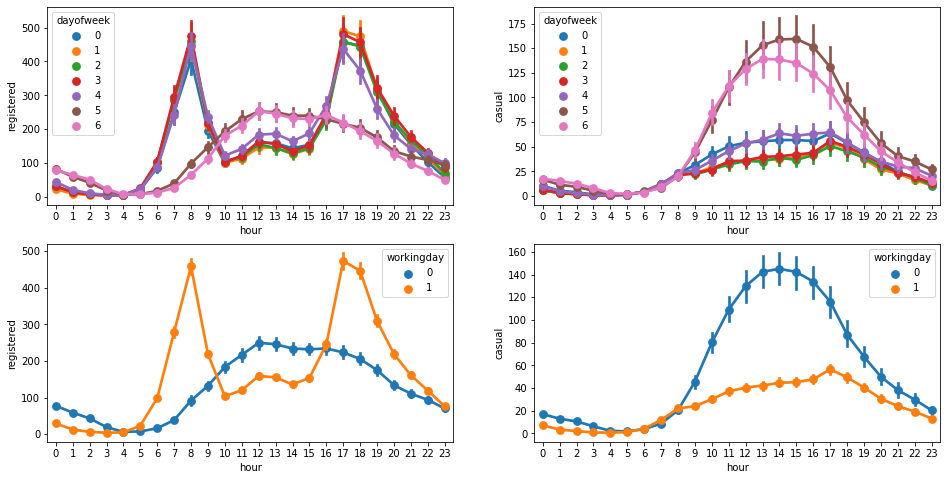

In [94]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(16, 8)
sns.pointplot(data=df, x='hour', y='registered', hue='dayofweek', ax=ax1)
sns.pointplot(data=df, x='hour', y='casual', hue='dayofweek', ax=ax2)
sns.pointplot(data=df, x='hour', y='registered', hue='workingday', ax=ax3)
sns.pointplot(data=df, x='hour', y='casual', hue='workingday', ax=ax4)

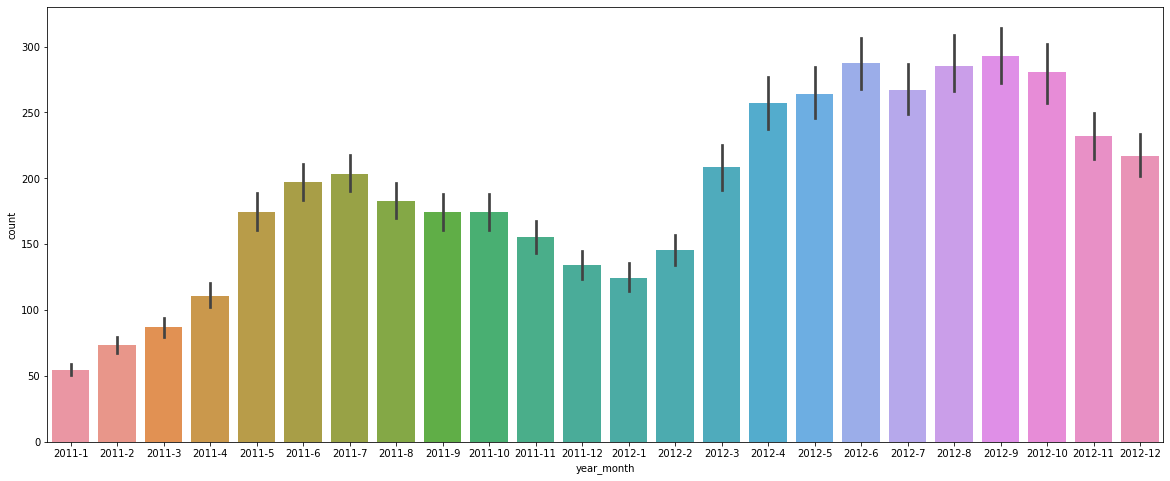

In [98]:
figure, (ax1) = plt.subplots()
figure.set_size_inches(20, 8)
sns.barplot(data=df, x='year_month', y='count', ax=ax1)